In [4]:
import keypoint_moseq as kpms

In [8]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [6]:
from pathlib import Path

expr_dir = Path("/projects/kumar-lab/miaod/projects/uvFI/experiments/2025-06-18_kpms-video-analysis/")
outputs_dir = expr_dir / "outputs"

project_dir = expr_dir / "data"
model_name = "2025-06-13_kpms-inference_data"

In [12]:
from src.methods import (
    load_and_format_data,
    generate_plots_and_movies
)

In [15]:
G_BASE_PATH = "/projects/kumar-lab/miaod/projects/uvFI/experiments/2025-06-12_kpms-training/"
G_POSE_CSV_DIR = os.path.join(G_BASE_PATH, "data", "poses_csv")

data, metadata, coords = load_and_format_data(G_POSE_CSV_DIR, project_dir)

Loading keypoint files: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [01:53<00:00,  2.21it/s]


In [26]:
G_PROJ_PATH = os.path.join(G_BASE_PATH, "results")
G_MODEL_NAME = "2025_06_12-17_00_11"

model, data, metadata, iteration = kpms.load_checkpoint(G_PROJ_PATH, G_MODEL_NAME) 

In [27]:
results = kpms.extract_results(model, metadata, G_PROJ_PATH, G_MODEL_NAME)

Saved results to /projects/kumar-
lab/miaod/projects/uvFI/experiments/2025-06-12_kpms-
training/results/2025_06_12-17_00_11/results.h5


In [29]:
config_fn = lambda: kpms.load_config(G_PROJ_PATH)

Saving trajectory plots to /projects/kumar-lab/miaod/projects/uvFI/experiments/2025-06-12_kpms-training/results/2025_06_12-17_00_11/trajectory_plots


Generating trajectory plots: 100%|██████| 82/82 [00:35<00:00,  2.34it/s]


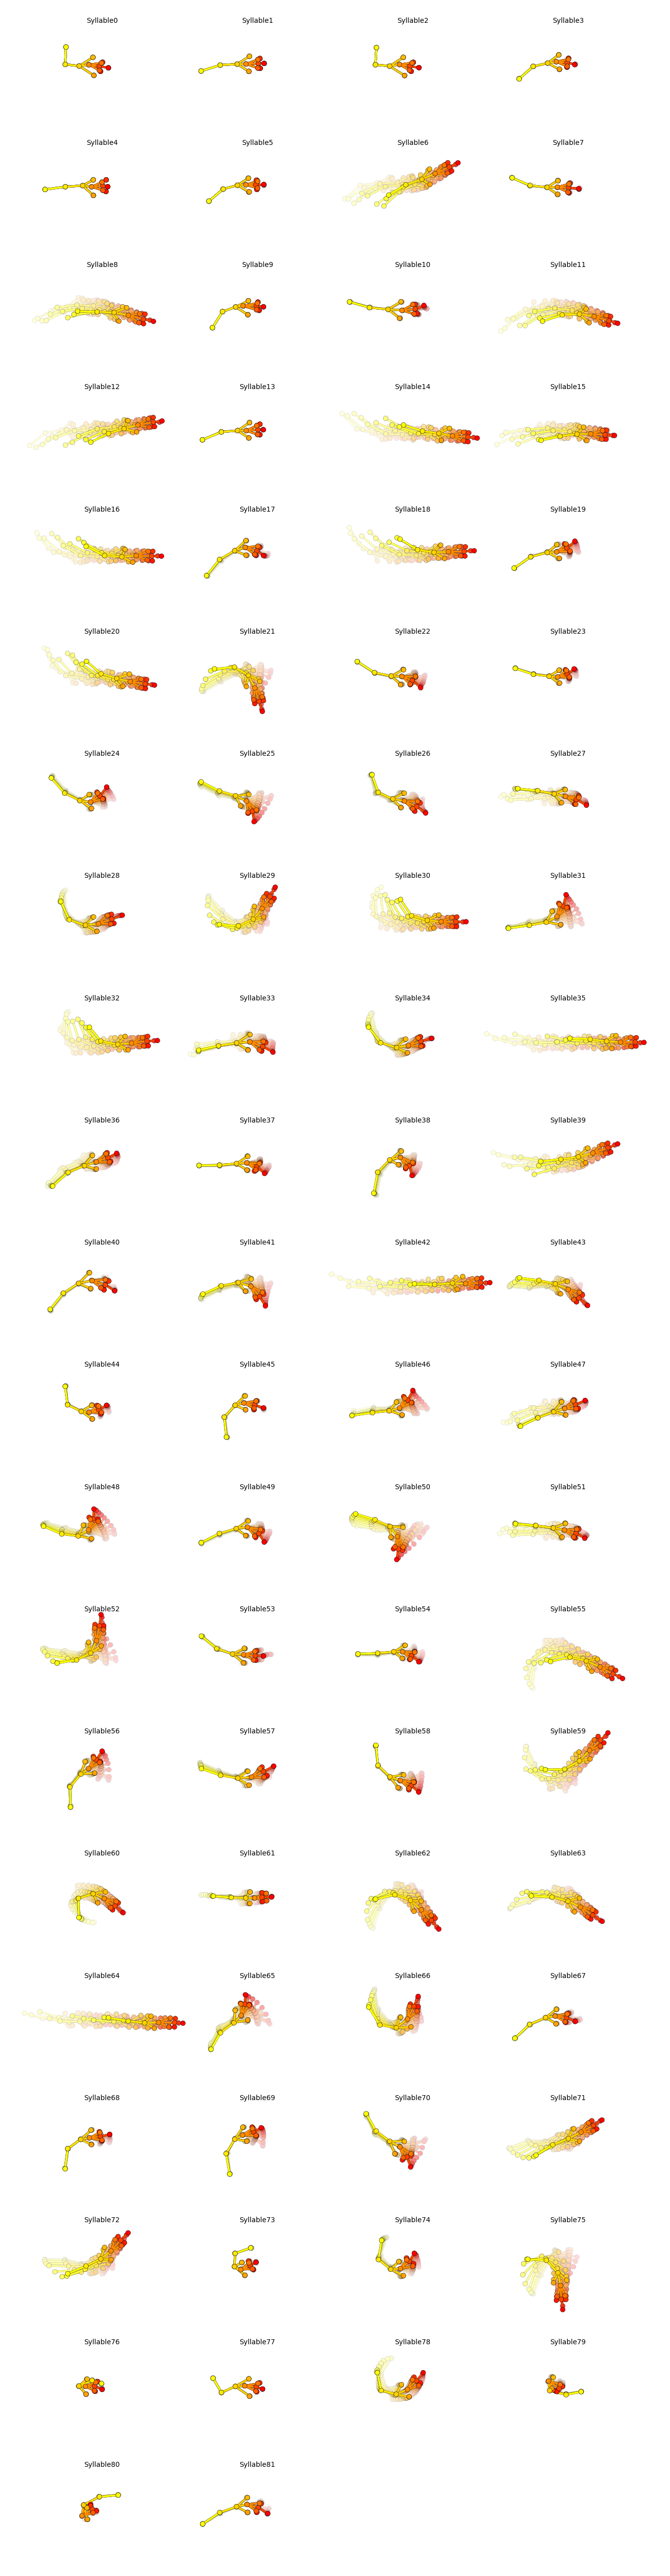

Writing grid movies to /projects/kumar-lab/miaod/projects/uvFI/experiments/2025-06-12_kpms-training/results/2025_06_12-17_00_11/grid_movies


ERROR:src.methods:Visualization generation failed: No matching videos found for AgedB6-0446_pose_est_v6.csv


RuntimeError: Visualization generation failed: No matching videos found for AgedB6-0446_pose_est_v6.csv

In [31]:
generate_plots_and_movies(G_MODEL_NAME, results, coords, G_PROJ_PATH, config_fn)